In [119]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import os
import sys
import glob
import requests
import yahist
from yahist import Hist1D
from scipy.integrate import odeint
import scipy.optimize
import scipy.stats
import gzip
from tqdm.auto import tqdm
from utils import fit_exp

In [120]:
yahist.utils.set_default_style()

In [121]:
dfc = pd.read_json("../sources/googlemobility/data/data.json.gz")
dfc["date"] = pd.to_datetime(dfc["date"])

In [122]:
dfc["category"].value_counts()

retail/recreation    77318
grocery/pharmacy     74859
workplace            67077
transitstations      30982
residential          25172
parks                18636
Name: category, dtype: int64

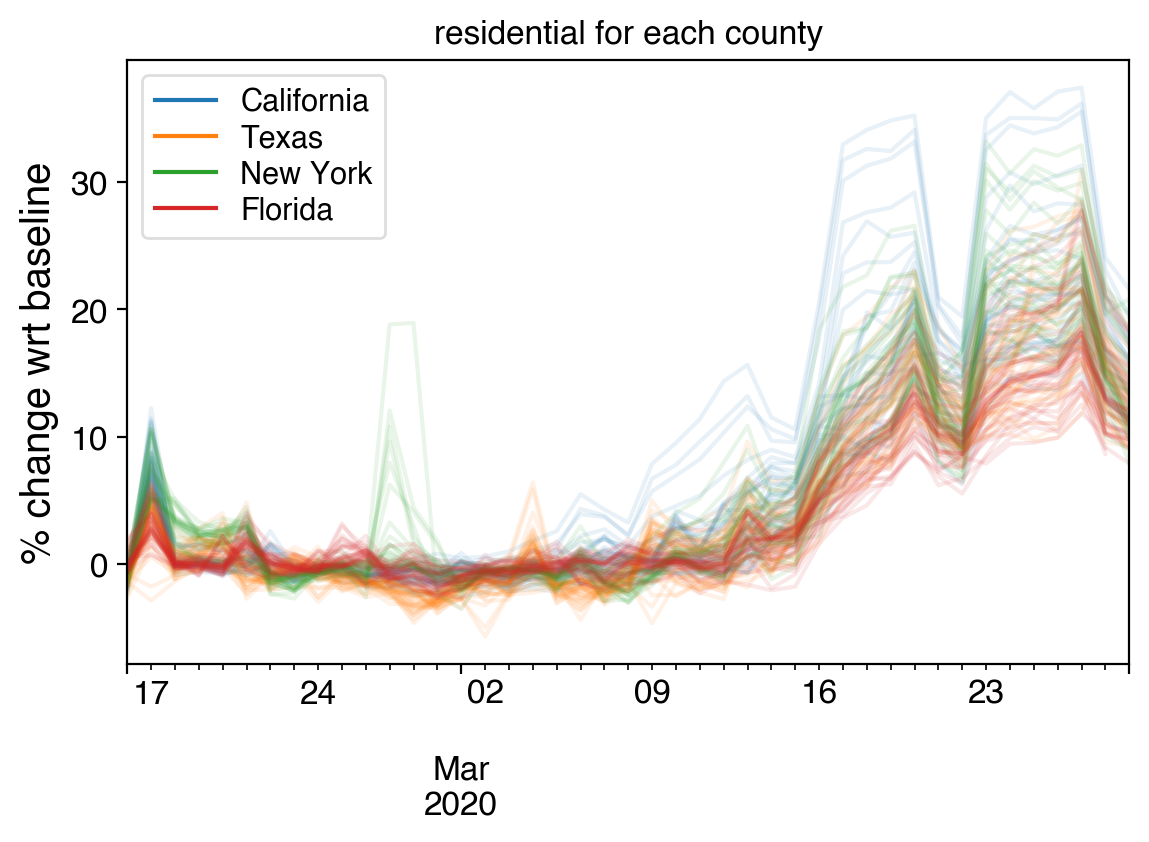

In [123]:
fig, ax = plt.subplots()
    
df = pd.pivot_table(dfc, index=["state","county","date"], columns=["category"], values="value").reset_index().set_index("date")
category = "residential"
colors = ["C0","C1","C2","C3","C4"]
gcolors = (x for x in colors)
states = [
    "California",
    "Texas",
    "New York",
    "Florida",
]
for state in states:
    color = next(gcolors)
    df.query(f"state=='{state}'").groupby("county")[category].plot(
        ax=ax,
        color=color,
        alpha=0.1,
        label="",
    );
for state,color in zip(states,colors):
    ax.plot([],[],label=state, color=color)
ax.set_title(f"{category} for each county")
ax.set_xlabel("")
ax.set_ylabel("% change wrt baseline")
ax.legend()

AttributeError: 'AxesSubplot' object has no attribute 'set_color_cycle'

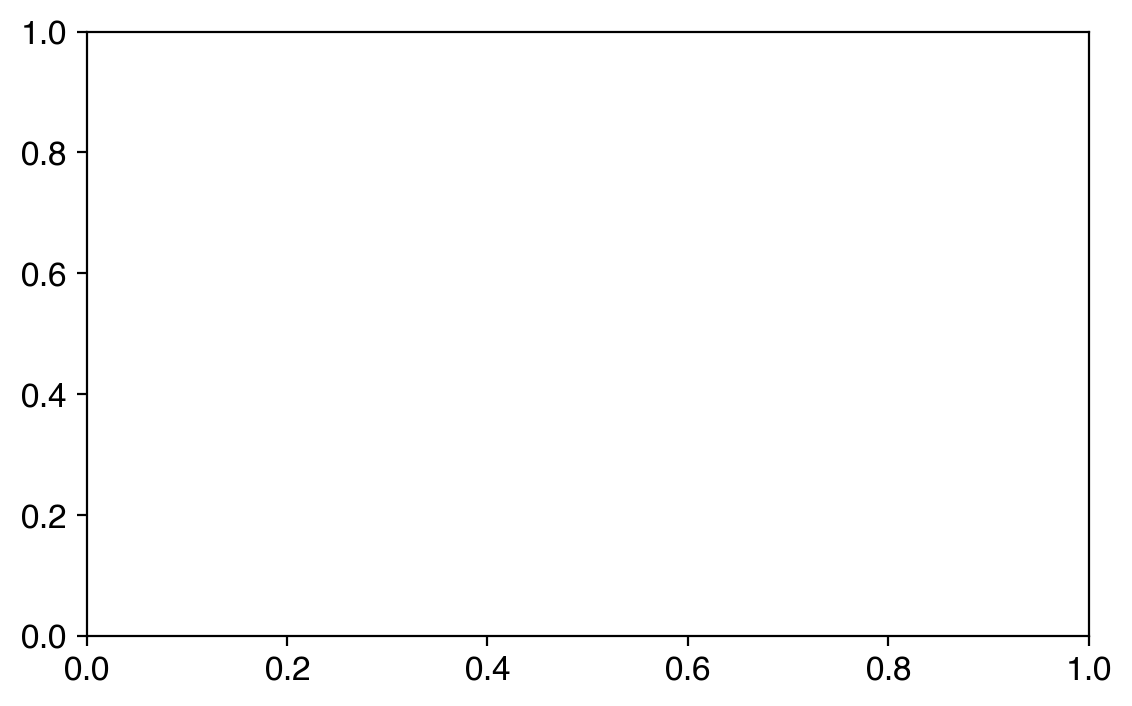

In [144]:
plt.gca().set_color_cycle

In [154]:
print(plt.style.available)


['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [260]:
# vls = ["solid","dashdot","dotted","dashed"]
# vcolor = plt.rcParams["axes.prop_cycle"].by_key()["color"] + ["k","red"]

# linestyle = np.repeat(np.array(vls),len(vcolor)).tolist()
# color = np.tile(np.array(vcolor),len(vls)).tolist()
# print(linestyle)
# print(color)
# print(len(set(zip(color,linestyle))))

In [261]:
# import matplotlib
# matplotlib.cm.get_cmap(plt.get_cmap(name))
# plt.get_cmap("tab20c").colors
# type(list(plt.get_cmap("tab20c").colors)[0][0])



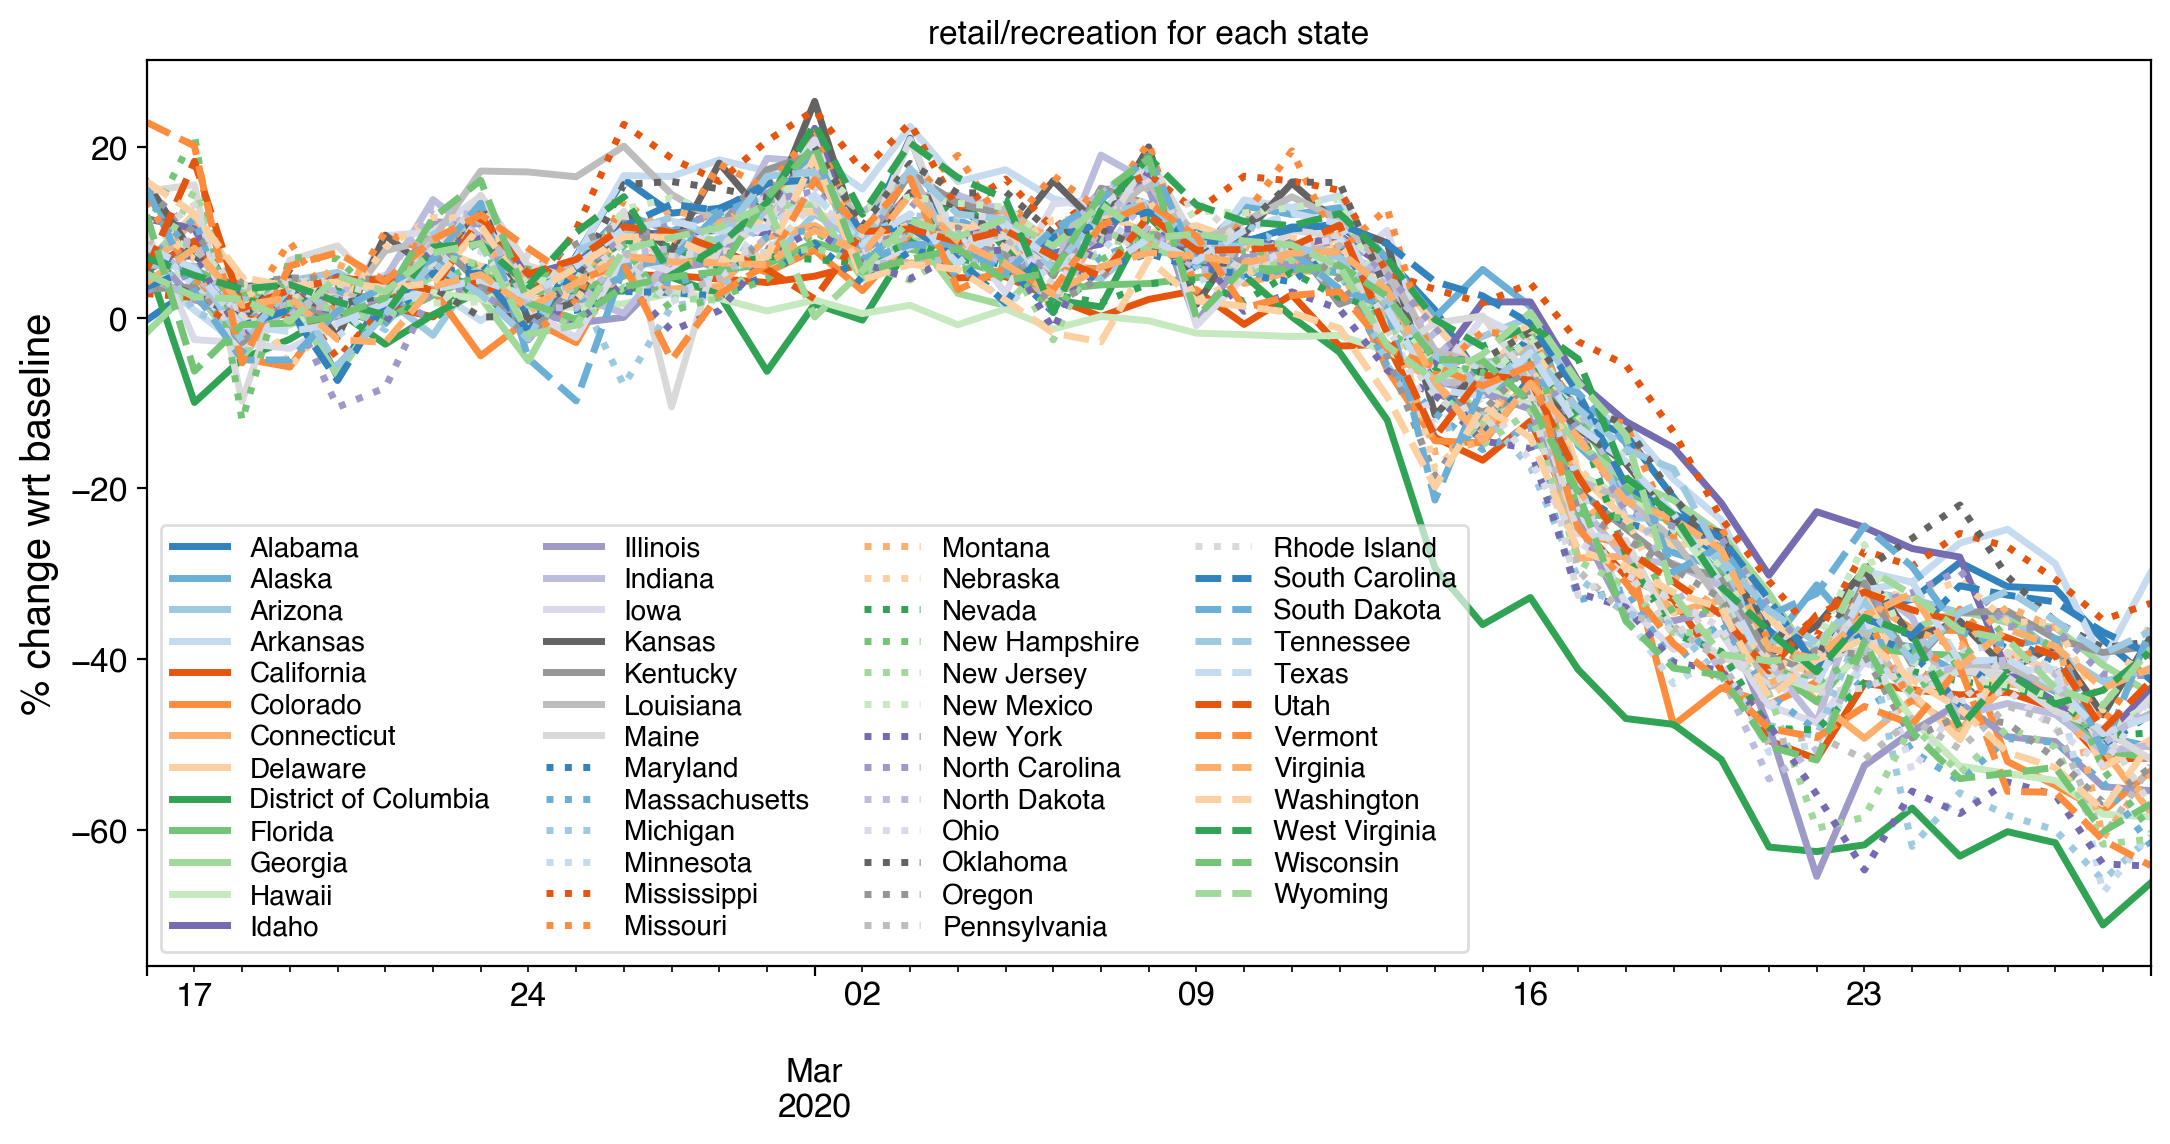

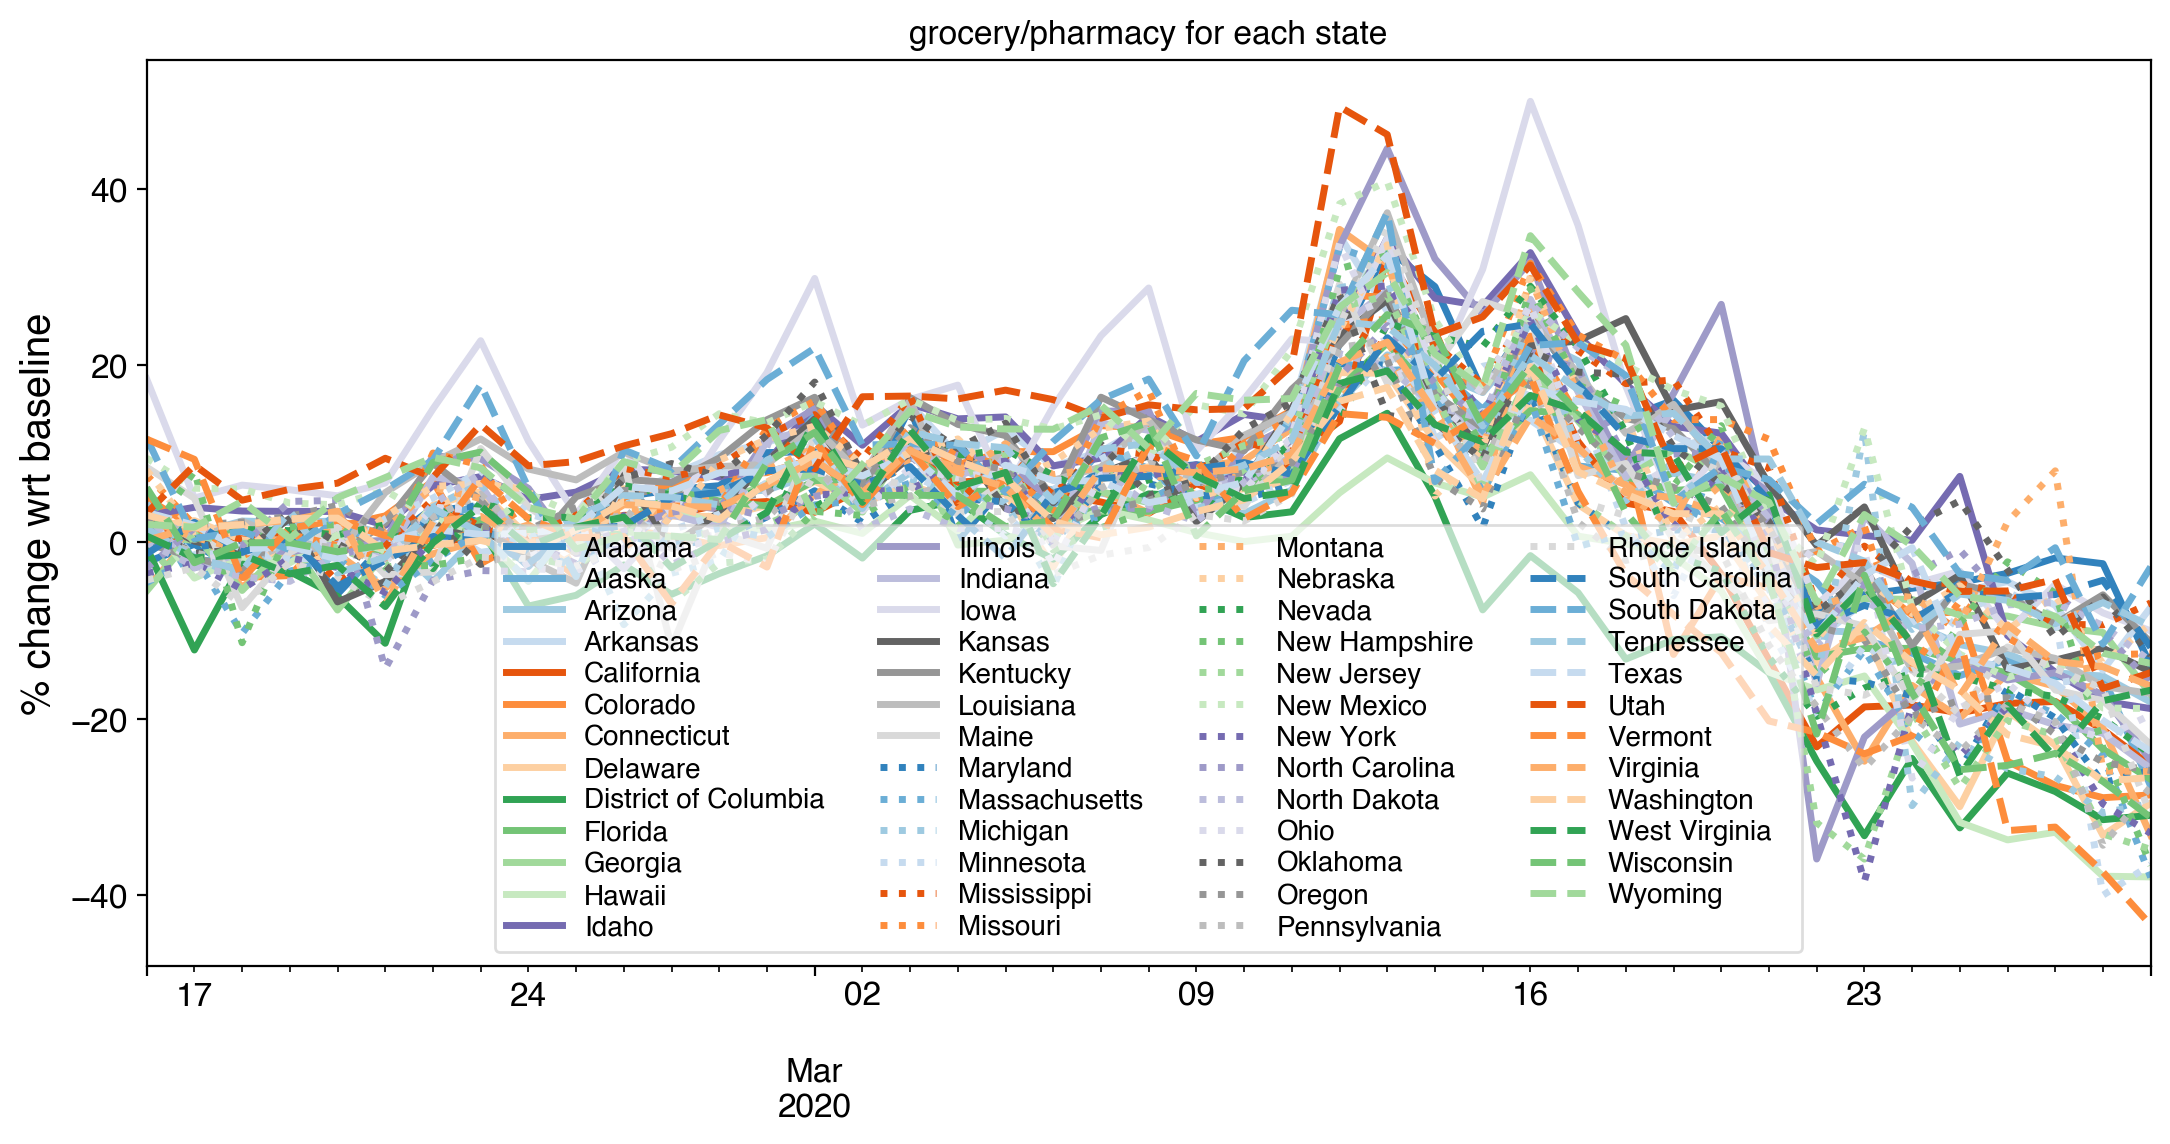

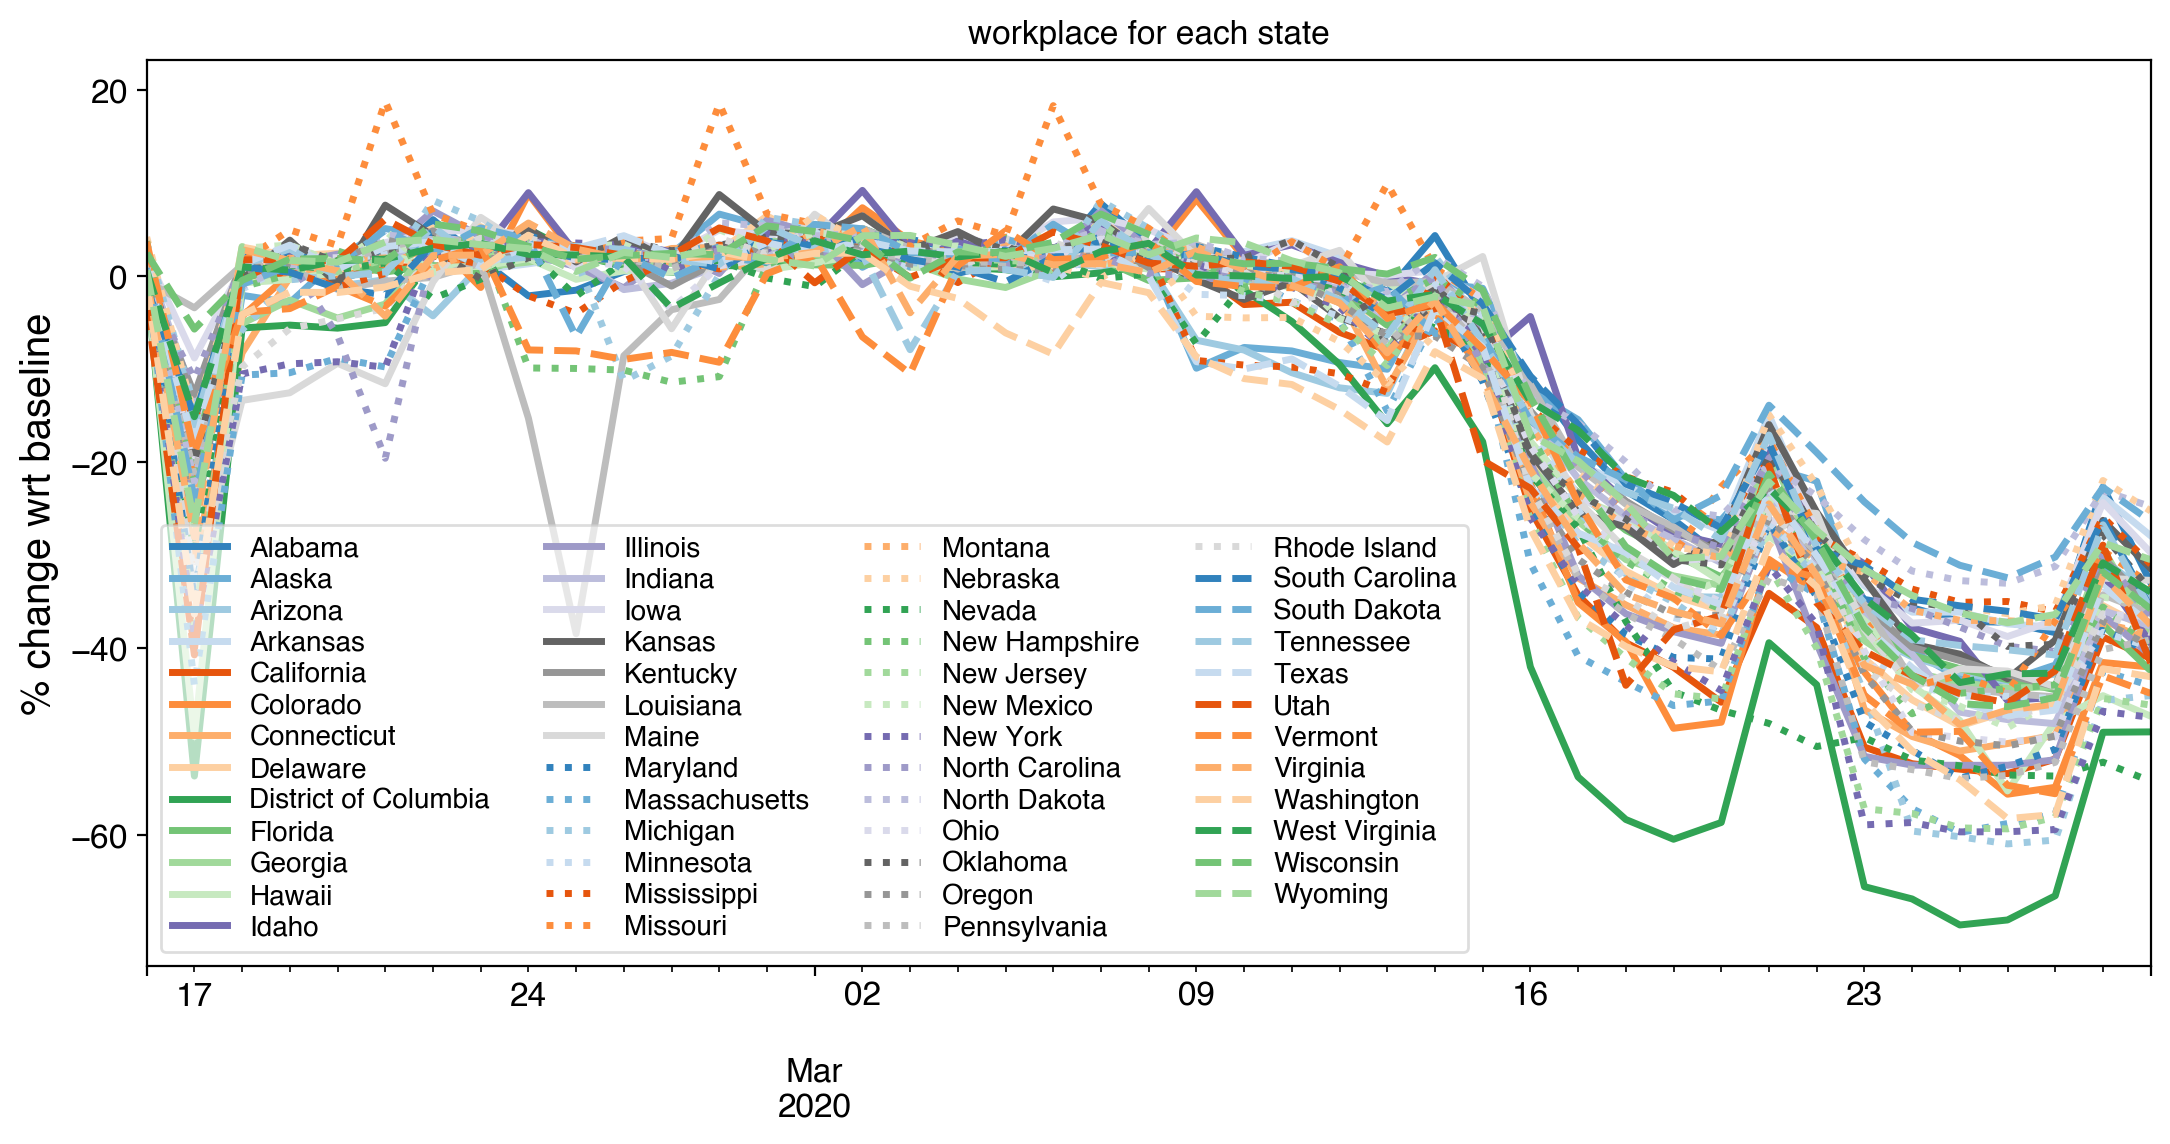

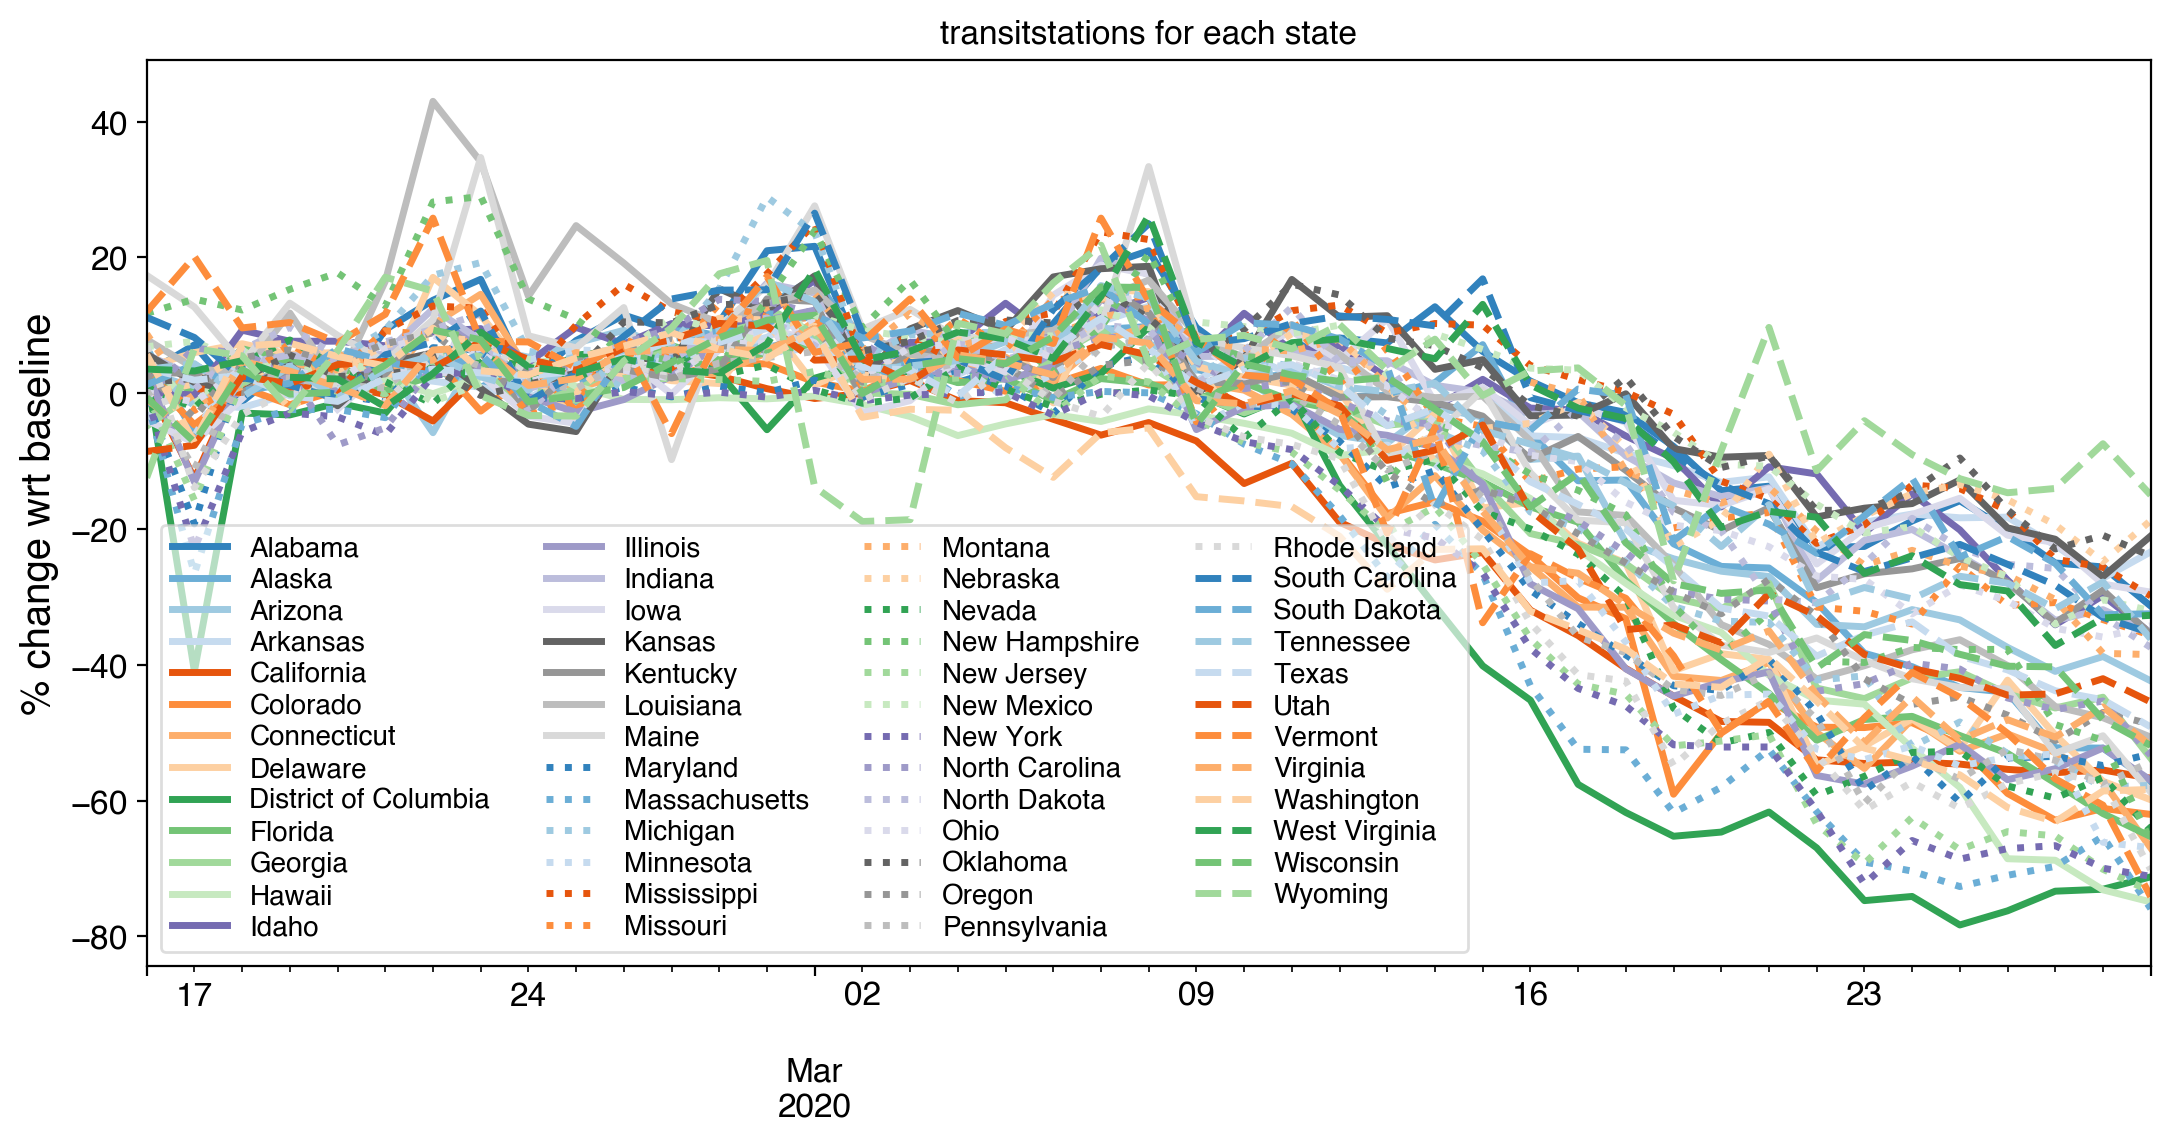

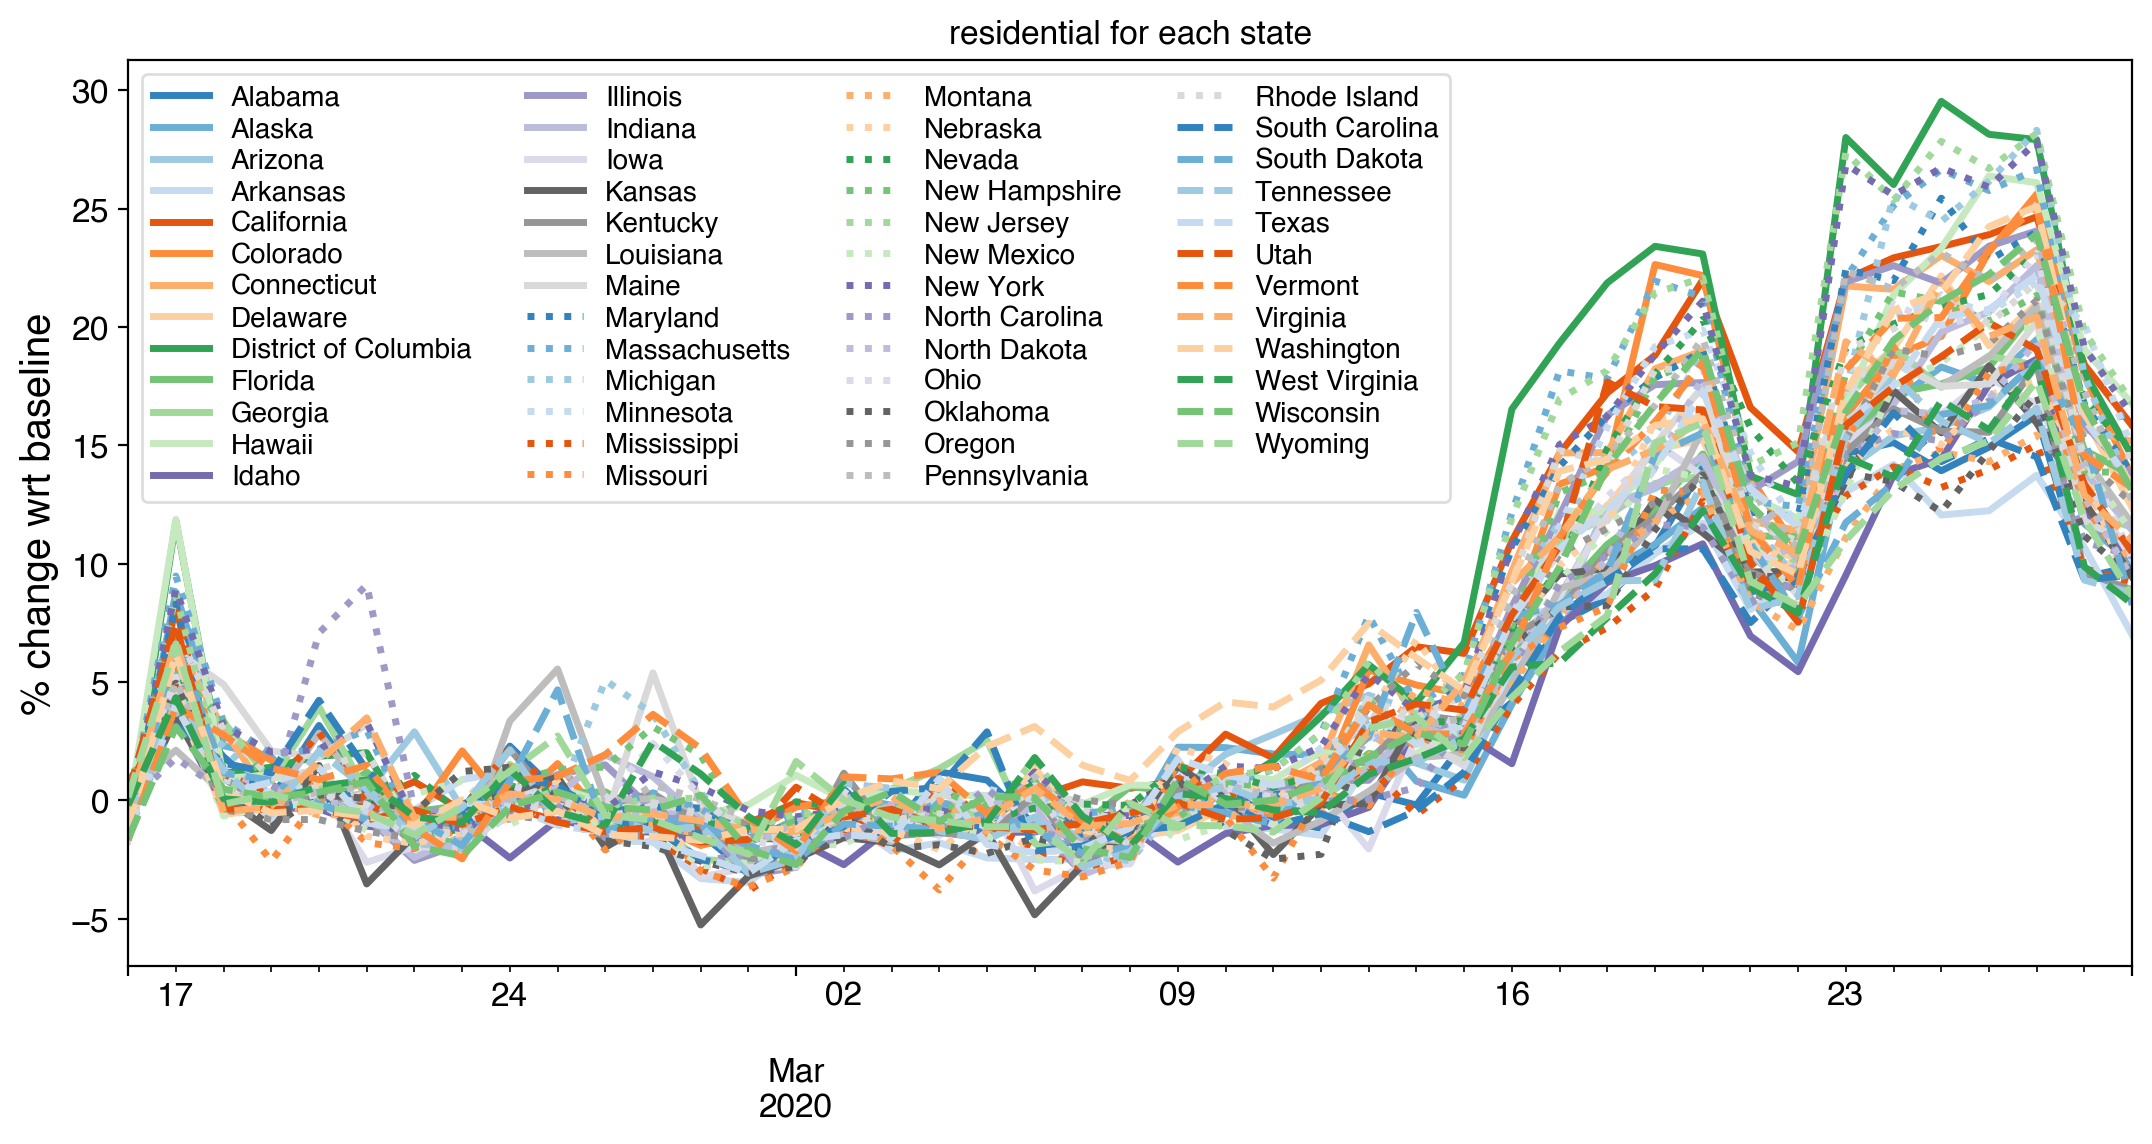

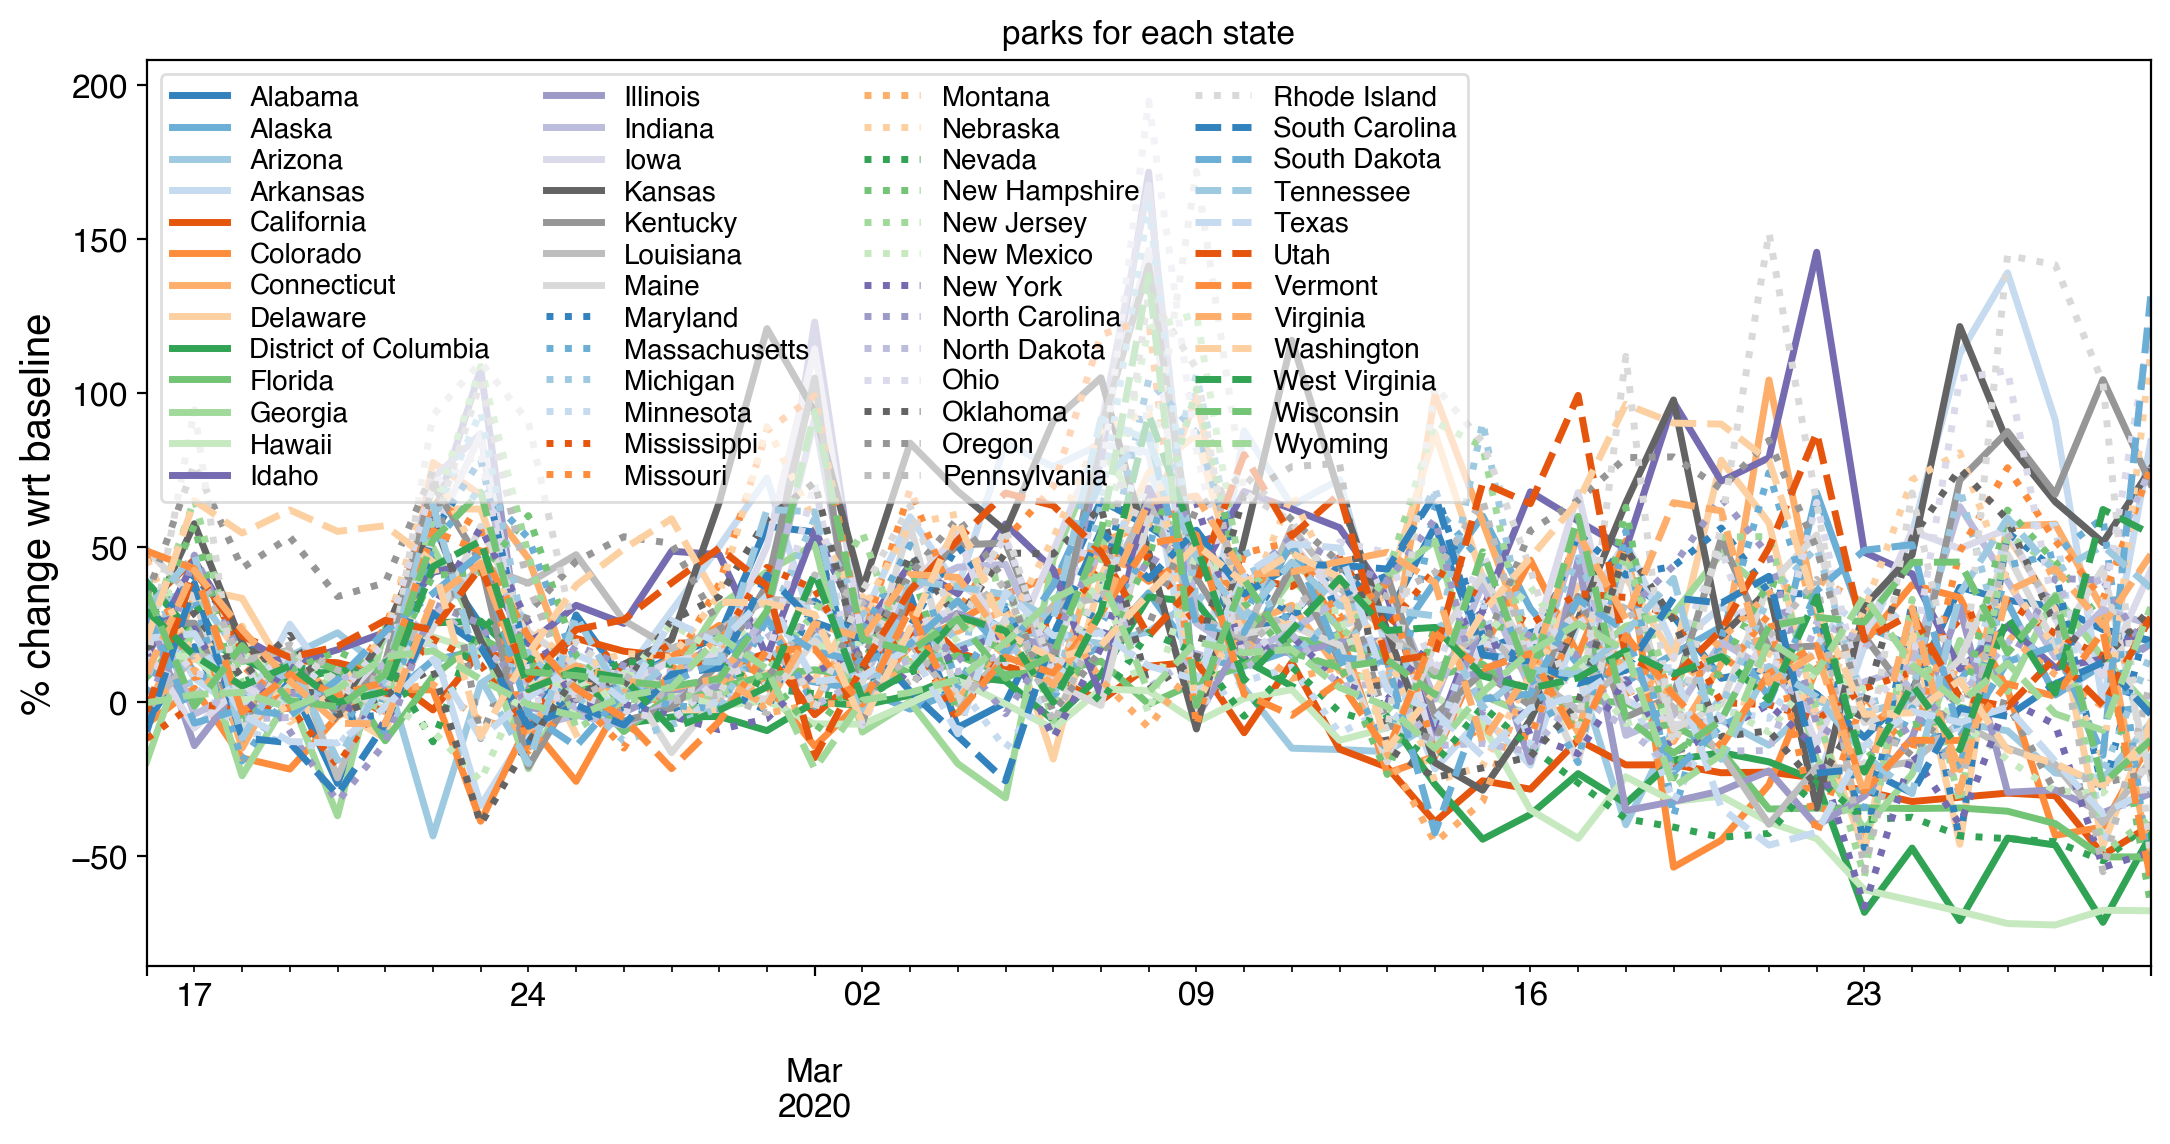

In [267]:
for category in ["retail/recreation","grocery/pharmacy","workplace","transitstations","residential","parks"]:
    fig, ax = plt.subplots(figsize=(12,6))
    vls = ["solid","dotted","dashed","dashdot"]
    ax.set_prop_cycle(
        linestyle = np.repeat(np.array(vls),len(vcolor)),
        color = (x for x in sum([list(plt.get_cmap("tab20c").colors) for _ in vls],[]))
    )
    df = pd.pivot_table(dfc, index=["state","county","date"], columns=["category"], values="value").reset_index().set_index("date")
    state = "US"
    df.query(f"state=='{state}'").groupby("county")[category].plot(
        ax=ax,
        lw=2.5,
    );
    ax.set_title(f"{category} for each state")
    ax.set_xlabel("")
    ax.set_ylabel("% change wrt baseline")
    ax.legend(ncol=4,fontsize=10)

In [113]:
# fig, ax = plt.subplots()
# # state = "New York"
# # state = "Texas"
# state = "Hawaii"
# category = "residential"
# dfc[(dfc["state"]==state) & (dfc["category"]==category)].set_index("date").groupby("county")["value"].plot(
#     ax=ax,color="gray",
#     alpha=0.5,
# );
# ax.set_title(f"{category} for {state} counties")
# ax.set_xlabel("")
# ax.set_ylabel("% change wrt baseline")

In [114]:
# dfc["test"] = dfc["value"]*-0.5

In [115]:
# fig,ax = plt.subplots()
# # state = "California"
# state = "New York"
# category = "residential"
# v1 = dfc[(dfc["state"]==state) & (dfc["category"]==category)].set_index("date").groupby("county")["value"]
# category = "workplace"
# v2 = dfc[(dfc["state"]==state) & (dfc["category"]==category)].set_index("date").groupby("county")["test"]

# v1.plot(
#     ax=ax,color="C0",
#     alpha=0.3,
# );
# v2.plot(
#     ax=ax,color="C1",
#     alpha=0.3,
# );


In [116]:
# state = "New York"
# category = "residential"
# v1 = dfc[(dfc["state"]==state) & (dfc["category"]==category)].set_index(["date","county"])["value"]
# category = "workplace"
# v2 = dfc[(dfc["state"]==state) & (dfc["category"]==category)].set_index(["date","county"])["value"]

# (v1+v2).groupby("county").plot()

In [117]:
# fig,ax = plt.subplots()
# state = "California"
# category = "workplace"
# dfc[(dfc["state"]==state) & (dfc["category"]==category)].set_index("date").groupby("county")["value"].plot(
#     ax=ax,color="gray",
#     alpha=0.5,
# );